In [1]:
import pandas as pd
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
%matplotlib inline

import dateutil.parser
from dateutil import parser
from datetime import datetime
df1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170506.txt")
df2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt")
df3 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170520.txt")
df4 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170527.txt")
df = pd.concat([df1, df2, df3, df4])
df = df.reset_index(drop = True)
df['EXITS'] = df["EXITS                                                               "]
df.drop("EXITS                                                               ", axis = 1, inplace = True)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,00:00:00,REGULAR,6157740,2085315
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,04:00:00,REGULAR,6157777,2085319
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,08:00:00,REGULAR,6157810,2085353
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,12:00:00,REGULAR,6157963,2085453
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,16:00:00,REGULAR,6158212,2085529
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,20:00:00,REGULAR,6158521,2085589
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,00:00:00,REGULAR,6158637,2085612
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,04:00:00,REGULAR,6158654,2085617
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,08:00:00,REGULAR,6158661,2085641
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,12:00:00,REGULAR,6158703,2085730


In [2]:
df['new_key'] = df[['C/A', 'UNIT', 'SCP', 'STATION']].apply(lambda x: ' '.join(x), axis=1)
df['parsed_datetime'] = pd.to_datetime(df.DATE + " " + df.TIME, format = "%m/%d/%Y %H:%M:%S")
# df['date_time'] = (df[['DATE', 'TIME']].apply(lambda x: ' '.join(x), axis=1).str.replace('/','-'))
# df['parsed_datetime'] = df.apply(lambda row: parser.parse(row.date_time), axis=1)
# df['date'] = (df['parsed_datetime'].apply(lambda x: x.date()))
# df['entries_num'] = int(df['ENTRIES'])-int(df['ENTRIES'][1:])
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,new_key,parsed_datetime
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,00:00:00,REGULAR,6157740,2085315,A002 R051 02-00-00 59 ST,2017-04-29 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,04:00:00,REGULAR,6157777,2085319,A002 R051 02-00-00 59 ST,2017-04-29 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,08:00:00,REGULAR,6157810,2085353,A002 R051 02-00-00 59 ST,2017-04-29 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,12:00:00,REGULAR,6157963,2085453,A002 R051 02-00-00 59 ST,2017-04-29 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,16:00:00,REGULAR,6158212,2085529,A002 R051 02-00-00 59 ST,2017-04-29 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,20:00:00,REGULAR,6158521,2085589,A002 R051 02-00-00 59 ST,2017-04-29 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,00:00:00,REGULAR,6158637,2085612,A002 R051 02-00-00 59 ST,2017-04-30 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,04:00:00,REGULAR,6158654,2085617,A002 R051 02-00-00 59 ST,2017-04-30 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,08:00:00,REGULAR,6158661,2085641,A002 R051 02-00-00 59 ST,2017-04-30 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,12:00:00,REGULAR,6158703,2085730,A002 R051 02-00-00 59 ST,2017-04-30 12:00:00


In [3]:
station_id = pd.Categorical(df['new_key']).codes
df['station_id'] = station_id
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,new_key,parsed_datetime,station_id
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,00:00:00,REGULAR,6157740,2085315,A002 R051 02-00-00 59 ST,2017-04-29 00:00:00,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,04:00:00,REGULAR,6157777,2085319,A002 R051 02-00-00 59 ST,2017-04-29 04:00:00,0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,08:00:00,REGULAR,6157810,2085353,A002 R051 02-00-00 59 ST,2017-04-29 08:00:00,0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,12:00:00,REGULAR,6157963,2085453,A002 R051 02-00-00 59 ST,2017-04-29 12:00:00,0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,16:00:00,REGULAR,6158212,2085529,A002 R051 02-00-00 59 ST,2017-04-29 16:00:00,0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,20:00:00,REGULAR,6158521,2085589,A002 R051 02-00-00 59 ST,2017-04-29 20:00:00,0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,00:00:00,REGULAR,6158637,2085612,A002 R051 02-00-00 59 ST,2017-04-30 00:00:00,0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,04:00:00,REGULAR,6158654,2085617,A002 R051 02-00-00 59 ST,2017-04-30 04:00:00,0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,08:00:00,REGULAR,6158661,2085641,A002 R051 02-00-00 59 ST,2017-04-30 08:00:00,0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,12:00:00,REGULAR,6158703,2085730,A002 R051 02-00-00 59 ST,2017-04-30 12:00:00,0


In [4]:
df.drop(['C/A', 'UNIT', 'SCP', 'DIVISION', 'new_key', 'DATE', 'TIME', 'DESC'], axis = 1, inplace = True)
df.sort_values(['station_id','parsed_datetime'], ascending=[True,True])
df

,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id
0,59 ST,NQR456W,6157740,2085315,2017-04-29 00:00:00,0
1,59 ST,NQR456W,6157777,2085319,2017-04-29 04:00:00,0
2,59 ST,NQR456W,6157810,2085353,2017-04-29 08:00:00,0
3,59 ST,NQR456W,6157963,2085453,2017-04-29 12:00:00,0
4,59 ST,NQR456W,6158212,2085529,2017-04-29 16:00:00,0
5,59 ST,NQR456W,6158521,2085589,2017-04-29 20:00:00,0
6,59 ST,NQR456W,6158637,2085612,2017-04-30 00:00:00,0
7,59 ST,NQR456W,6158654,2085617,2017-04-30 04:00:00,0
8,59 ST,NQR456W,6158661,2085641,2017-04-30 08:00:00,0
9,59 ST,NQR456W,6158703,2085730,2017-04-30 12:00:00,0


In [5]:
df['entry_num'] = abs(df['ENTRIES'].diff())
df['exit_num'] = abs(df['EXITS'].diff())
df['station_diff'] = df['station_id'].diff()
df[df['STATION'] == 'GRD CNTRL-42 ST']

,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff
150830,GRD CNTRL-42 ST,4567S,813017,2422091,2017-04-29 01:00:00,3603,117153725.0,1785198.0,1.0
150831,GRD CNTRL-42 ST,4567S,813019,2422100,2017-04-29 05:00:00,3603,2.0,9.0,0.0
150832,GRD CNTRL-42 ST,4567S,813032,2422285,2017-04-29 09:00:00,3603,13.0,185.0,0.0
150833,GRD CNTRL-42 ST,4567S,813054,2422792,2017-04-29 13:00:00,3603,22.0,507.0,0.0
150834,GRD CNTRL-42 ST,4567S,813179,2423350,2017-04-29 17:00:00,3603,125.0,558.0,0.0
150835,GRD CNTRL-42 ST,4567S,813308,2423718,2017-04-29 21:00:00,3603,129.0,368.0,0.0
150836,GRD CNTRL-42 ST,4567S,813359,2423932,2017-04-30 01:00:00,3603,51.0,214.0,0.0
150837,GRD CNTRL-42 ST,4567S,813359,2423936,2017-04-30 05:00:00,3603,0.0,4.0,0.0
150838,GRD CNTRL-42 ST,4567S,813372,2424044,2017-04-30 09:00:00,3603,13.0,108.0,0.0
150839,GRD CNTRL-42 ST,4567S,813432,2424357,2017-04-30 13:00:00,3603,60.0,313.0,0.0


In [6]:
# keeps only differences between same stations and eliminates first record for each station since we have nothing to compare it to
df = df[df.station_diff == 0.0]
df

,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff
1,59 ST,NQR456W,6157777,2085319,2017-04-29 04:00:00,0,37.0,4.0,0.0
2,59 ST,NQR456W,6157810,2085353,2017-04-29 08:00:00,0,33.0,34.0,0.0
3,59 ST,NQR456W,6157963,2085453,2017-04-29 12:00:00,0,153.0,100.0,0.0
4,59 ST,NQR456W,6158212,2085529,2017-04-29 16:00:00,0,249.0,76.0,0.0
5,59 ST,NQR456W,6158521,2085589,2017-04-29 20:00:00,0,309.0,60.0,0.0
6,59 ST,NQR456W,6158637,2085612,2017-04-30 00:00:00,0,116.0,23.0,0.0
7,59 ST,NQR456W,6158654,2085617,2017-04-30 04:00:00,0,17.0,5.0,0.0
8,59 ST,NQR456W,6158661,2085641,2017-04-30 08:00:00,0,7.0,24.0,0.0
9,59 ST,NQR456W,6158703,2085730,2017-04-30 12:00:00,0,42.0,89.0,0.0
10,59 ST,NQR456W,6158797,2085785,2017-04-30 16:00:00,0,94.0,55.0,0.0


In [7]:
df.loc[30:50]

,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff
30,59 ST,NQR456W,6163517,2087485,2017-05-04 00:00:00,0,263.0,34.0,0.0
31,59 ST,NQR456W,6163534,2087487,2017-05-04 04:00:00,0,17.0,2.0,0.0
32,59 ST,NQR456W,6163576,2087581,2017-05-04 08:00:00,0,42.0,94.0,0.0
33,59 ST,NQR456W,6163739,2087856,2017-05-04 12:00:00,0,163.0,275.0,0.0
34,59 ST,NQR456W,6164051,2087916,2017-05-04 16:00:00,0,312.0,60.0,0.0
35,59 ST,NQR456W,6164865,2087987,2017-05-04 20:00:00,0,814.0,71.0,0.0
36,59 ST,NQR456W,6165120,2088020,2017-05-05 00:00:00,0,255.0,33.0,0.0
37,59 ST,NQR456W,6165147,2088024,2017-05-05 04:00:00,0,27.0,4.0,0.0
38,59 ST,NQR456W,6165183,2088112,2017-05-05 08:00:00,0,36.0,88.0,0.0
39,59 ST,NQR456W,6165346,2088396,2017-05-05 12:00:00,0,163.0,284.0,0.0


In [8]:
df['time'] = df.apply(lambda row: row.parsed_datetime.time(), axis=1)

/Users/matiasbeeck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [205]:
# df['weekday'] = df['parsed_datetime'].dt.weekday
# df['weekday_bin'] = df.apply(lambda row: 1 if df.weekday < 5 else 0, axis=1)

df['Weekday'] = df['parsed_datetime'].dt.weekday
df['Weekend'] = 0
df['Weekend'] = df['Weekday'] >= 5
df.drop('Weekday', axis=1, inplace = True)
df[['STATION', 'LINENAME', 'parsed_datetime', 'Weekend', 'station_id']]

,STATION,LINENAME,parsed_datetime,Weekend,station_id
0,59 ST,NQR456W,2017-04-29 04:00:00,True,0
1,59 ST,NQR456W,2017-04-29 08:00:00,True,0
2,59 ST,NQR456W,2017-04-29 12:00:00,True,0
3,59 ST,NQR456W,2017-04-29 16:00:00,True,0
4,59 ST,NQR456W,2017-04-29 20:00:00,True,0
5,59 ST,NQR456W,2017-04-30 00:00:00,True,0
6,59 ST,NQR456W,2017-04-30 04:00:00,True,0
7,59 ST,NQR456W,2017-04-30 08:00:00,True,0
8,59 ST,NQR456W,2017-04-30 12:00:00,True,0
9,59 ST,NQR456W,2017-04-30 16:00:00,True,0


In [10]:
df['line_sort'] = df.apply(lambda row: ''.join(sorted(row.LINENAME)), axis=1)


/Users/matiasbeeck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
officialdf = df[:]

In [12]:
df.groupby(['STATION','line_sort'])[['line_sort']].count()


line_sort
STATION         line_sort              
1 AV            L                  1639
103 ST          1                   984
                6                   999
                BC                  492
103 ST-CORONA   7                  1502
104 ST          A                   820
                JZ                  588
110 ST          6                   993
111 ST          7                   820
                A                  1147
                J                   663
116 ST          23                 1320
                6                  1319
                BC                  999
116 ST-COLUMBIA 1                   984
121 ST          JZ                  652
125 ST          1                   835
                23                 1321
                456                2290
                ABCD               2632
135 ST          23                 2005
                BC                 1798
137 ST CITY COL 1                  1645
138/GRAND CONC  45                  492
14 ST           123FLM             5386
                ACEL               1636
14 ST-UNION SQ  456LNQRW           6224
145 ST          1                  1148
                3                   495
                ABCD               1488
...                                 ...
THIRTY THIRD ST 1                  2797
TIMES SQ-42 ST  1237ACENQRS        1476
                1237ACENQRSW       6737
TOMPKINSVILLE   1                  1162
TREMONT AV      BD                 1476
TWENTY THIRD ST 1                  1389
UNION ST        R                   999
UTICA AV        AC                 2132
V.CORTLANDT PK  1                   656
VAN SICLEN AV   3                   667
                JZ                  492
VAN SICLEN AVE  C                   492
VERNON-JACKSON  7                  2126
W 4 ST-WASH SQ  ABCDEFM            3139
W 8 ST-AQUARIUM FQ                 1311
WAKEFIELD/241   2                   820
WALL ST         23                 3634
                45                 4572
WEST FARMS SQ   25                 1467
WESTCHESTER SQ  6                   498
WHITEHALL S-FRY 1RW                2474
WHITLOCK AV     6                   983
WILSON AV       L                   735
WINTHROP ST     25                  660
WOODHAVEN BLVD  JZ                 1320
                MR                 1838
WOODLAWN        4                   820
WORLD TRADE CTR 23ACE              1761
YORK ST         F                   482
ZEREGA AV       6                   984

[465 rows x 1 columns]

In [13]:
df.groupby(['STATION','line_sort'])[['entry_num']].sum().sort_values(by=['entry_num'])


,,entry_num
STATION,line_sort,
BAY RIDGE AV,R,1.000000e+00
ORCHARD BEACH,6,7.700000e+01
BEACH 105 ST,AS,6.377000e+03
BROAD CHANNEL,AS,7.040000e+03
BEACH 98 ST,AS,1.265400e+04
ROCKAWAY PARK B,AS,1.635500e+04
BEACH 44 ST,A,1.814000e+04
121 ST,JZ,2.085300e+04
TOMPKINSVILLE,1,2.102400e+04


In [203]:
df[df.STATION == 'GRD CNTRL-42 ST'].sort_values(by=['station_id', 'parsed_datetime'])
# df.loc[df.entry_num < 0, :]['STATION'].unique()

,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff,time,Weekend,line_sort,topfilter
147235,GRD CNTRL-42 ST,4567S,813019,2422100,2017-04-29 05:00:00,3603,2.0,9.0,0.0,05:00:00,True,4567S,GRD CNTRL-42 ST 4567S
147236,GRD CNTRL-42 ST,4567S,813032,2422285,2017-04-29 09:00:00,3603,13.0,185.0,0.0,09:00:00,True,4567S,GRD CNTRL-42 ST 4567S
147237,GRD CNTRL-42 ST,4567S,813054,2422792,2017-04-29 13:00:00,3603,22.0,507.0,0.0,13:00:00,True,4567S,GRD CNTRL-42 ST 4567S
147238,GRD CNTRL-42 ST,4567S,813179,2423350,2017-04-29 17:00:00,3603,125.0,558.0,0.0,17:00:00,True,4567S,GRD CNTRL-42 ST 4567S
147239,GRD CNTRL-42 ST,4567S,813308,2423718,2017-04-29 21:00:00,3603,129.0,368.0,0.0,21:00:00,True,4567S,GRD CNTRL-42 ST 4567S
147240,GRD CNTRL-42 ST,4567S,813359,2423932,2017-04-30 01:00:00,3603,51.0,214.0,0.0,01:00:00,True,4567S,GRD CNTRL-42 ST 4567S
147241,GRD CNTRL-42 ST,4567S,813359,2423936,2017-04-30 05:00:00,3603,0.0,4.0,0.0,05:00:00,True,4567S,GRD CNTRL-42 ST 4567S
147242,GRD CNTRL-42 ST,4567S,813372,2424044,2017-04-30 09:00:00,3603,13.0,108.0,0.0,09:00:00,True,4567S,GRD CNTRL-42 ST 4567S
147243,GRD CNTRL-42 ST,4567S,813432,2424357,2017-04-30 13:00:00,3603,60.0,313.0,0.0,13:00:00,True,4567S,GRD CNTRL-42 ST 4567S
147244,GRD CNTRL-42 ST,4567S,813537,2424809,2017-04-30 17:00:00,3603,105.0,452.0,0.0,17:00:00,True,4567S,GRD CNTRL-42 ST 4567S


In [15]:
df = df.reset_index()
df = df.drop('index', 1)
df[df.STATION == 'EASTCHSTER/DYRE'].sort_values(by='entry_num')


,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff,time,Weekend,line_sort
190630,EASTCHSTER/DYRE,5,1334708,2553279,2017-04-29 05:00:00,4658,0.000000e+00,3.000000e+00,0.0,05:00:00,True,5
573650,EASTCHSTER/DYRE,5,5938157,7596902,2017-05-15 05:00:00,4659,0.000000e+00,0.000000e+00,0.0,05:00:00,False,5
573649,EASTCHSTER/DYRE,5,5938157,7596902,2017-05-15 01:00:00,4659,0.000000e+00,0.000000e+00,0.0,01:00:00,False,5
573648,EASTCHSTER/DYRE,5,5938157,7596902,2017-05-14 21:00:00,4659,0.000000e+00,0.000000e+00,0.0,21:00:00,True,5
573647,EASTCHSTER/DYRE,5,5938157,7596902,2017-05-14 17:00:00,4659,0.000000e+00,0.000000e+00,0.0,17:00:00,True,5
573646,EASTCHSTER/DYRE,5,5938157,7596902,2017-05-14 13:00:00,4659,0.000000e+00,0.000000e+00,0.0,13:00:00,True,5
190794,EASTCHSTER/DYRE,5,2523023,1046466,2017-04-29 05:00:00,4662,0.000000e+00,0.000000e+00,0.0,05:00:00,True,5
190795,EASTCHSTER/DYRE,5,2523023,1046466,2017-04-29 09:00:00,4662,0.000000e+00,0.000000e+00,0.0,09:00:00,True,5
190797,EASTCHSTER/DYRE,5,2523024,1046466,2017-04-29 17:00:00,4662,0.000000e+00,0.000000e+00,0.0,17:00:00,True,5
190798,EASTCHSTER/DYRE,5,2523024,1046466,2017-04-29 21:00:00,4662,0.000000e+00,0.000000e+00,0.0,21:00:00,True,5


In [16]:
df.iloc[190820:190840]

,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff,time,Weekend,line_sort
190820,EASTCHSTER/DYRE,5,2524506,1046984,2017-05-03 13:00:00,4662,5.300000e+01,6.000000e+00,0.0,13:00:00,False,5
190821,EASTCHSTER/DYRE,5,2524589,1047045,2017-05-03 17:00:00,4662,8.300000e+01,6.100000e+01,0.0,17:00:00,False,5
190822,EASTCHSTER/DYRE,5,2524663,1047143,2017-05-03 21:00:00,4662,7.400000e+01,9.800000e+01,0.0,21:00:00,False,5
190823,EASTCHSTER/DYRE,5,2524674,1047160,2017-05-04 01:00:00,4662,1.100000e+01,1.700000e+01,0.0,01:00:00,False,5
190824,EASTCHSTER/DYRE,5,2524680,1047163,2017-05-04 05:00:00,4662,6.000000e+00,3.000000e+00,0.0,05:00:00,False,5
190825,EASTCHSTER/DYRE,5,2525010,1047200,2017-05-04 09:00:00,4662,3.300000e+02,3.700000e+01,0.0,09:00:00,False,5
190826,EASTCHSTER/DYRE,5,2525075,1047213,2017-05-04 13:00:00,4662,6.500000e+01,1.300000e+01,0.0,13:00:00,False,5
190827,EASTCHSTER/DYRE,5,1560221483,1728055978,2017-05-05 09:00:00,4662,1.557696e+09,1.727009e+09,0.0,09:00:00,False,5
190828,EASTCHSTER/DYRE,5,1560221425,1728055986,2017-05-05 13:00:00,4662,5.800000e+01,8.000000e+00,0.0,13:00:00,False,5
190829,EASTCHSTER/DYRE,5,1560221334,1728056067,2017-05-05 17:00:00,4662,9.100000e+01,8.100000e+01,0.0,17:00:00,False,5


In [17]:
df[df.STATION == '72 ST'].sort_values(by='entry_num')


,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff,time,Weekend,line_sort
324871,72 ST,123,0,1968,2017-05-12 13:00:00,3250,0.0,0.000000e+00,0.0,13:00:00,False,123
324740,72 ST,123,6200,0,2017-05-11 05:00:00,3247,0.0,0.000000e+00,0.0,05:00:00,False,123
324739,72 ST,123,6200,0,2017-05-11 01:00:00,3247,0.0,0.000000e+00,0.0,01:00:00,False,123
324735,72 ST,123,6196,0,2017-05-10 09:00:00,3247,0.0,0.000000e+00,0.0,09:00:00,False,123
324734,72 ST,123,6196,0,2017-05-10 05:00:00,3247,0.0,0.000000e+00,0.0,05:00:00,False,123
324733,72 ST,123,6196,0,2017-05-10 01:00:00,3247,0.0,0.000000e+00,0.0,01:00:00,False,123
324730,72 ST,123,6194,0,2017-05-09 13:00:00,3247,0.0,0.000000e+00,0.0,13:00:00,False,123
324729,72 ST,123,6194,0,2017-05-09 09:00:00,3247,0.0,0.000000e+00,0.0,09:00:00,False,123
324741,72 ST,123,6200,0,2017-05-11 09:00:00,3247,0.0,0.000000e+00,0.0,09:00:00,False,123
324728,72 ST,123,6194,0,2017-05-09 05:00:00,3247,0.0,0.000000e+00,0.0,05:00:00,False,123


In [18]:
df.iloc[132440:132450]

,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff,time,Weekend,line_sort
132440,72 ST,123,1759457,1060757,2017-05-05 17:00:00,3241,787.0,1.810000e+02,0.0,17:00:00,False,123
132441,72 ST,123,1760344,1061003,2017-05-05 21:00:00,3241,887.0,2.460000e+02,0.0,21:00:00,False,123
132442,72 ST,123,8105279,6934001,2017-04-29 05:00:00,3242,0.0,2.200000e+01,0.0,05:00:00,True,123
132443,72 ST,123,8105279,6934126,2017-04-29 09:00:00,3242,0.0,1.250000e+02,0.0,09:00:00,True,123
132444,72 ST,123,8105279,6934505,2017-04-29 13:00:00,3242,0.0,3.790000e+02,0.0,13:00:00,True,123
132445,72 ST,123,8105279,6934924,2017-04-29 17:00:00,3242,0.0,4.190000e+02,0.0,17:00:00,True,123
132446,72 ST,123,8105279,6935278,2017-04-29 21:00:00,3242,0.0,3.540000e+02,0.0,21:00:00,True,123
132447,72 ST,123,691260128,1758148378,2017-04-30 13:00:00,3242,683154849.0,1.751213e+09,0.0,13:00:00,True,123
132448,72 ST,123,691259656,1758148759,2017-04-30 17:00:00,3242,472.0,3.810000e+02,0.0,17:00:00,True,123
132449,72 ST,123,691259285,1758149040,2017-04-30 21:00:00,3242,371.0,2.810000e+02,0.0,21:00:00,True,123


In [19]:
pre_removaldf = df[:]

In [20]:
# DROPPING ENTRIES AND EXIT OUTLIERS
df = df.drop(df[df.entry_num > 10000].index)
df = df.drop(df[df.exit_num > 10000].index)

df.reset_index(drop=True)


,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff,time,Weekend,line_sort
0,59 ST,NQR456W,6157777,2085319,2017-04-29 04:00:00,0,37.0,4.0,0.0,04:00:00,True,456NQRW
1,59 ST,NQR456W,6157810,2085353,2017-04-29 08:00:00,0,33.0,34.0,0.0,08:00:00,True,456NQRW
2,59 ST,NQR456W,6157963,2085453,2017-04-29 12:00:00,0,153.0,100.0,0.0,12:00:00,True,456NQRW
3,59 ST,NQR456W,6158212,2085529,2017-04-29 16:00:00,0,249.0,76.0,0.0,16:00:00,True,456NQRW
4,59 ST,NQR456W,6158521,2085589,2017-04-29 20:00:00,0,309.0,60.0,0.0,20:00:00,True,456NQRW
5,59 ST,NQR456W,6158637,2085612,2017-04-30 00:00:00,0,116.0,23.0,0.0,00:00:00,True,456NQRW
6,59 ST,NQR456W,6158654,2085617,2017-04-30 04:00:00,0,17.0,5.0,0.0,04:00:00,True,456NQRW
7,59 ST,NQR456W,6158661,2085641,2017-04-30 08:00:00,0,7.0,24.0,0.0,08:00:00,True,456NQRW
8,59 ST,NQR456W,6158703,2085730,2017-04-30 12:00:00,0,42.0,89.0,0.0,12:00:00,True,456NQRW
9,59 ST,NQR456W,6158797,2085785,2017-04-30 16:00:00,0,94.0,55.0,0.0,16:00:00,True,456NQRW


In [162]:
import matplotlib.style as style
style.use('seaborn-poster')


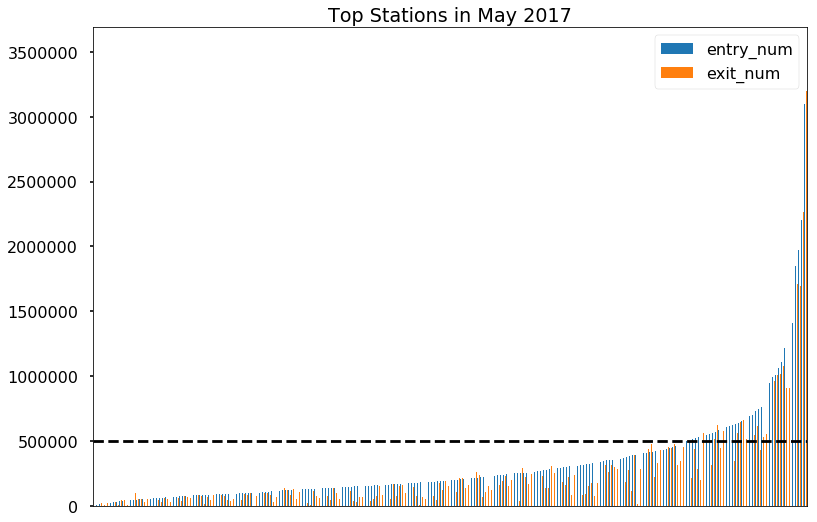

In [163]:
graphdf = df.groupby(['STATION','line_sort'])[['entry_num', 'exit_num']].sum().sort_values(by=['entry_num'])
graphdf.plot(kind='bar', title = "Top Stations in May 2017").xaxis.set_visible(False);
plt.axhline(y=500000, color = 'black', linestyle='--')

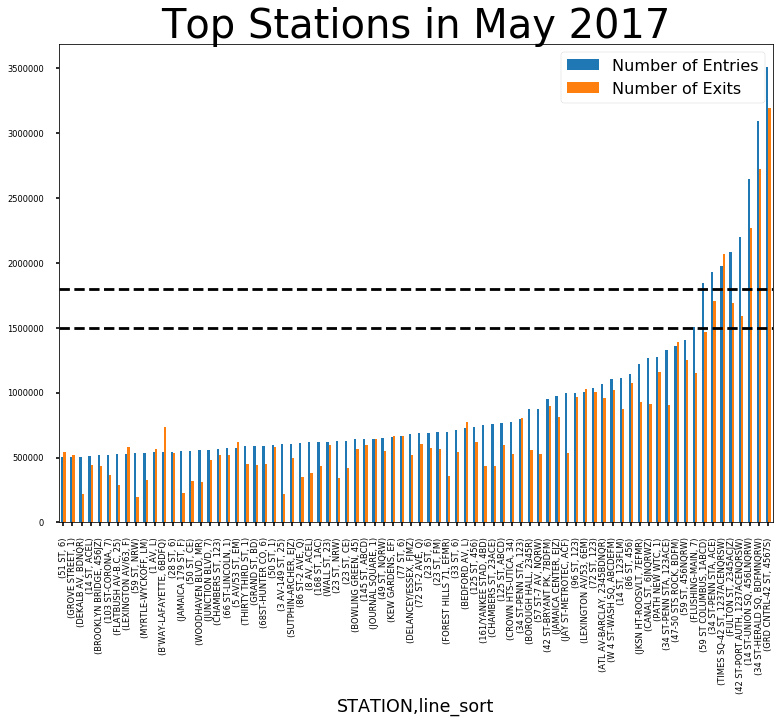

In [220]:
graphdf_cut = graphdf[graphdf.entry_num > 500000]
graphdf_cut.plot(kind='bar', title = "Top Stations in May 2017", fontsize = 'small');
plt.title('Top Stations in May 2017', size = 40)
plt.axhline(y=1500000, color = 'black', linestyle='--')
plt.axhline(y=1800000, color = 'black', linestyle='--')
L=plt.legend()
L.get_texts()[0].set_text('Number of Entries')
L.get_texts()[1].set_text('Number of Exits')

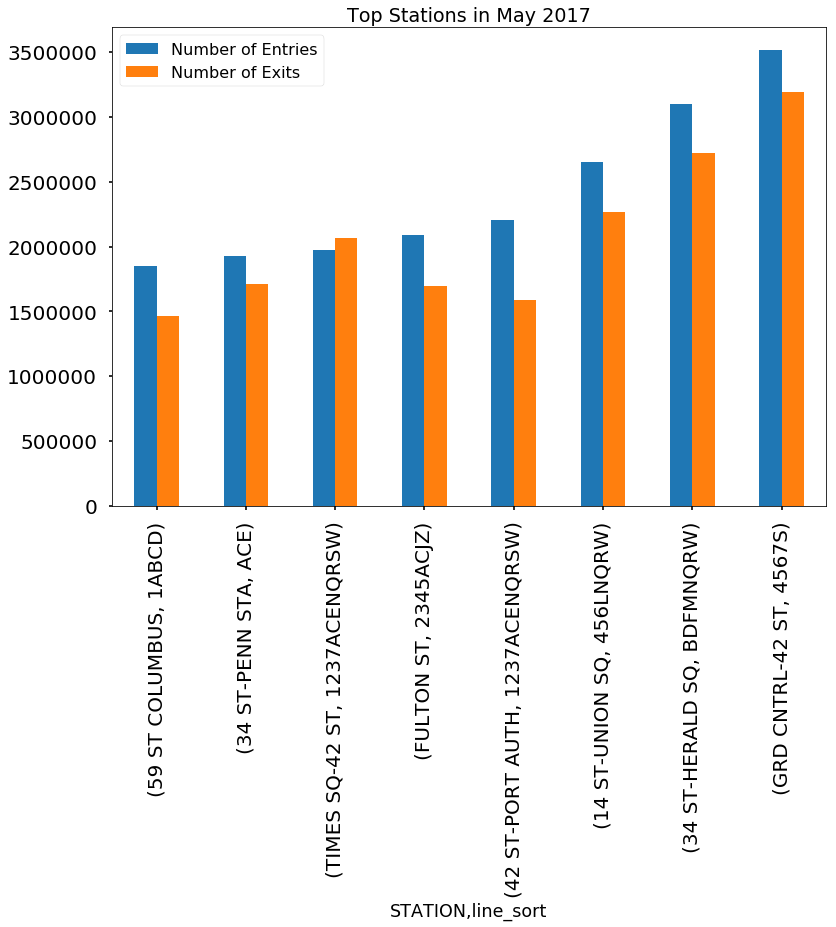

In [274]:
graphdf_cut.tail(8).plot(kind='bar', title = "Top Stations in May 2017", fontsize = 20);
L=plt.legend()
L.get_texts()[0].set_text('Number of Entries')
L.get_texts()[1].set_text('Number of Exits')

In [275]:
by_time = df.groupby(['STATION','line_sort','time'])[['entry_num', 'exit_num']].agg(['sum', 'count'])
by_time.columns = ['_'.join(col).strip() for col in by_time.columns.values]
[''.join(col).strip() for col in by_time.columns.values]
by_time['avg_entries'] = (by_time['entry_num_sum']/by_time['entry_num_count'])
by_time['avg_exits'] = (by_time['exit_num_sum']/by_time['exit_num_count'])

by_time = by_time.reset_index()
by_time.head()


,STATION,line_sort,time,entry_num_sum,entry_num_count,exit_num_sum,exit_num_count,avg_entries,avg_exits
0,1 AV,L,00:00:00,78152.0,240,74275.0,240,325.633333,309.479167
1,1 AV,L,04:00:00,19300.0,280,14085.0,280,68.928571,50.303571
2,1 AV,L,08:00:00,36560.0,275,72540.0,275,132.945455,263.781818
3,1 AV,L,10:19:46,621.0,5,2577.0,5,124.200000,515.400000
4,1 AV,L,12:00:00,113837.0,280,131694.0,280,406.560714,470.335714


In [276]:
by_time = by_time.rename(index=str, columns={"time": "time_parse"})

by_time['time_sec'] = by_time.apply(lambda row: row.time_parse.second, axis=1)
by_time['time_min'] = by_time.apply(lambda row: row.time_parse.minute, axis=1)

by_time_official = by_time[(by_time['time_min'] == 0) & (by_time['time_sec'] == 0)]

by_time_official.sort_values(by=['avg_entries'], ascending = False)


,STATION,line_sort,time_parse,entry_num_sum,entry_num_count,exit_num_sum,exit_num_count,avg_entries,avg_exits,time_sec,time_min
37021,YORK ST,F,21:00:00,107471.0,84,26287.0,84,1279.416667,312.940476,0,0
3423,BAY PKWY,N,09:00:00,129992.0,112,8940.0,112,1160.642857,79.821429,0,0
1840,23 ST,FM,20:00:00,308250.0,280,138267.0,280,1100.892857,493.810714,0,0
10265,GRAND ST,BD,20:00:00,228542.0,224,97530.0,224,1020.276786,435.401786,0,0
29656,PATH NEW WTC,1,21:00:00,3837.0,4,74.0,4,959.250000,18.500000,0,0
2187,57 ST-7 AV,NQRW,20:00:00,375522.0,392,107057.0,392,957.964286,273.104592,0,0
201,14 ST-UNION SQ,456LNQRW,21:00:00,966572.0,1064,537759.0,1064,908.432331,505.412594,0,0
2030,42 ST-BRYANT PK,7BDFM,20:00:00,508761.0,567,161578.0,567,897.285714,284.970018,0,0
37020,YORK ST,F,17:00:00,74163.0,84,32354.0,84,882.892857,385.166667,0,0
10311,GRD CNTRL-42 ST,4567S,21:00:00,782387.0,892,328474.0,892,877.115471,368.244395,0,0


### Above was on whole dataset, now doing it for only the top stations and splitting by weekend and weekday datasets

In [277]:
# Filtering original Dataframe to only include top stations
top_df = graphdf.tail(8).reset_index()
station_list = list(top_df.STATION)
line_list = list(top_df.line_sort) 
concattop = [m+ ' ' + str(n) for m,n in zip(station_list,line_list)]
concattop
df['topfilter'] = df['STATION'] + ' ' + df['line_sort']
topdf = df[df.topfilter.isin(concattop)]
topdf = topdf.reset_index(drop=True)
topdf

,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff,time,Weekend,line_sort,topfilter
0,TIMES SQ-42 ST,ACENQRS1237W,6659709,7849605,2017-04-29 04:00:00,62,91.0,79.0,0.0,04:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
1,TIMES SQ-42 ST,ACENQRS1237W,6659813,7849730,2017-04-29 08:00:00,62,104.0,125.0,0.0,08:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
2,TIMES SQ-42 ST,ACENQRS1237W,6660076,7850435,2017-04-29 12:00:00,62,263.0,705.0,0.0,12:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
3,TIMES SQ-42 ST,ACENQRS1237W,6660426,7851175,2017-04-29 16:00:00,62,350.0,740.0,0.0,16:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
4,TIMES SQ-42 ST,ACENQRS1237W,6660872,7851937,2017-04-29 20:00:00,62,446.0,762.0,0.0,20:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
5,TIMES SQ-42 ST,ACENQRS1237W,6661258,7852315,2017-04-30 00:00:00,62,386.0,378.0,0.0,00:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
6,TIMES SQ-42 ST,ACENQRS1237W,6661360,7852360,2017-04-30 04:00:00,62,102.0,45.0,0.0,04:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
7,TIMES SQ-42 ST,ACENQRS1237W,6661407,7852440,2017-04-30 08:00:00,62,47.0,80.0,0.0,08:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
8,TIMES SQ-42 ST,ACENQRS1237W,6661567,7852892,2017-04-30 12:00:00,62,160.0,452.0,0.0,12:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
9,TIMES SQ-42 ST,ACENQRS1237W,6661831,7853519,2017-04-30 16:00:00,62,264.0,627.0,0.0,16:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW


In [278]:
weekdays_df = topdf[topdf.Weekend == False]
weekend_df = topdf[topdf.Weekend == True]
weekend_df.head(10)


,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff,time,Weekend,line_sort,topfilter
0,TIMES SQ-42 ST,ACENQRS1237W,6659709,7849605,2017-04-29 04:00:00,62,91.0,79.0,0.0,04:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
1,TIMES SQ-42 ST,ACENQRS1237W,6659813,7849730,2017-04-29 08:00:00,62,104.0,125.0,0.0,08:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
2,TIMES SQ-42 ST,ACENQRS1237W,6660076,7850435,2017-04-29 12:00:00,62,263.0,705.0,0.0,12:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
3,TIMES SQ-42 ST,ACENQRS1237W,6660426,7851175,2017-04-29 16:00:00,62,350.0,740.0,0.0,16:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
4,TIMES SQ-42 ST,ACENQRS1237W,6660872,7851937,2017-04-29 20:00:00,62,446.0,762.0,0.0,20:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
5,TIMES SQ-42 ST,ACENQRS1237W,6661258,7852315,2017-04-30 00:00:00,62,386.0,378.0,0.0,00:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
6,TIMES SQ-42 ST,ACENQRS1237W,6661360,7852360,2017-04-30 04:00:00,62,102.0,45.0,0.0,04:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
7,TIMES SQ-42 ST,ACENQRS1237W,6661407,7852440,2017-04-30 08:00:00,62,47.0,80.0,0.0,08:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
8,TIMES SQ-42 ST,ACENQRS1237W,6661567,7852892,2017-04-30 12:00:00,62,160.0,452.0,0.0,12:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW
9,TIMES SQ-42 ST,ACENQRS1237W,6661831,7853519,2017-04-30 16:00:00,62,264.0,627.0,0.0,16:00:00,True,1237ACENQRSW,TIMES SQ-42 ST 1237ACENQRSW


In [279]:
entrances = pd.DataFrame(weekend_df.groupby('STATION').station_id.nunique())
entrances = entrances.reset_index()
entrances = entrances.rename(index=str, columns={"station_id": "entrance_count"})
entrances.reset_index(drop=True)

,STATION,entrance_count
0,14 ST-UNION SQ,38
1,34 ST-HERALD SQ,54
2,34 ST-PENN STA,56
3,42 ST-PORT AUTH,42
4,59 ST COLUMBUS,41
5,FULTON ST,89
6,GRD CNTRL-42 ST,65
7,TIMES SQ-42 ST,41


In [280]:
station_income_zip = pd.DataFrame([['14 ST-UNION SQ', 10003,100791],\
                                   ['34 ST-HERALD SQ', 10001,85168],\
                                   ['34 ST-PENN STA', 10001,85168],\
                                   ['42 ST-PORT AUTH', 10018,105479],\
                                   ['59 ST COLUMBUS', 10023,115080],\
                                   ['FULTON ST', 10038,82190],\
                                   ['GRD CNTRL-42 ST', 10017,163683],\
                                   ['TIMES SQ-42 ST', 10036,83812]],\
                                columns=['station','zipcode','avg_income'])
station_income_zip.sort_values(by=['station'])

,station,zipcode,avg_income
0,14 ST-UNION SQ,10003,100791
1,34 ST-HERALD SQ,10001,85168
2,34 ST-PENN STA,10001,85168
3,42 ST-PORT AUTH,10018,105479
4,59 ST COLUMBUS,10023,115080
5,FULTON ST,10038,82190
6,GRD CNTRL-42 ST,10017,163683
7,TIMES SQ-42 ST,10036,83812


## Weekday Analysis

In [281]:
by_time = weekdays_df.groupby(['topfilter','time'], as_index=False)[['entry_num', 'exit_num']].agg(['sum', 'count'])
by_time.columns = ['_'.join(col).strip() for col in by_time.columns.values]
[''.join(col).strip() for col in by_time.columns.values]
by_time['avg_entries'] = (by_time['entry_num_sum']/by_time['entry_num_count'])
by_time['avg_exits'] = (by_time['exit_num_sum']/by_time['exit_num_count'])
by_time['avg_totals'] = (by_time['entry_num_sum']+by_time['exit_num_sum'])/(by_time['entry_num_count']+by_time['exit_num_count'])


by_time = by_time.reset_index()

by_time = by_time.rename(index=str, columns={"time": "time_parse"})

by_time['time_sec'] = by_time.apply(lambda row: row.time_parse.second, axis=1)
by_time['time_min'] = by_time.apply(lambda row: row.time_parse.minute, axis=1)

by_time_official = by_time[(by_time['time_min'] == 0) & (by_time['time_sec'] == 0)]

by_time_official.sort_values(by=['topfilter', 'time_parse', 'avg_totals'], ascending = False)


,topfilter,time_parse,entry_num_sum,entry_num_count,exit_num_sum,exit_num_count,avg_entries,avg_exits,avg_totals,time_sec,time_min
109,TIMES SQ-42 ST 1237ACENQRSW,20:00:00,723950.0,818,422629.0,818,885.024450,516.661369,700.842910,0,0
108,TIMES SQ-42 ST 1237ACENQRSW,16:00:00,292149.0,818,328259.0,818,357.150367,401.294621,379.222494,0,0
107,TIMES SQ-42 ST 1237ACENQRSW,12:00:00,218015.0,818,610775.0,818,266.522005,746.668704,506.595355,0,0
103,TIMES SQ-42 ST 1237ACENQRSW,08:00:00,92439.0,818,149919.0,818,113.006112,183.275061,148.140587,0,0
102,TIMES SQ-42 ST 1237ACENQRSW,04:00:00,46706.0,818,17429.0,818,57.097800,21.306846,39.202323,0,0
101,TIMES SQ-42 ST 1237ACENQRSW,00:00:00,281119.0,818,123795.0,818,343.666259,151.338631,247.502445,0,0
100,GRD CNTRL-42 ST 4567S,21:00:00,742487.0,636,287668.0,636,1167.432390,452.308176,809.870283,0,0
99,GRD CNTRL-42 ST 4567S,20:00:00,544087.0,536,348002.0,536,1015.087687,649.257463,832.172575,0,0
97,GRD CNTRL-42 ST 4567S,17:00:00,398032.0,624,269869.0,624,637.871795,432.482372,535.177083,0,0
96,GRD CNTRL-42 ST 4567S,16:00:00,276599.0,536,242556.0,536,516.042910,452.529851,484.286381,0,0


### Morning Weekdays Analysis

In [282]:
by_time_official['time_hour'] = by_time.apply(lambda row: row.time_parse.hour, axis=1)

morning = by_time_official[(by_time_official['time_hour'].map(lambda x: int(x)) < 13) & (by_time_official['time_hour'].map(lambda x: int(x)) > 8)]
afternoon = by_time_official[(by_time_official['time_hour'].map(lambda x: int(x)) > 13) & (by_time_official['time_hour'].map(lambda x: int(x)) < 23)]
afternoon.head()

/Users/matiasbeeck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,topfilter,time_parse,entry_num_sum,entry_num_count,exit_num_sum,exit_num_count,avg_entries,avg_exits,avg_totals,time_sec,time_min,time_hour
6,14 ST-UNION SQ 456LNQRW,17:00:00,597384.0,757,415730.0,757,789.146631,549.180978,669.163804,0,0,17
7,14 ST-UNION SQ 456LNQRW,21:00:00,811592.0,760,435185.0,760,1067.884211,572.611842,820.248026,0,0,21
16,34 ST-HERALD SQ BDFMNQRW,16:00:00,508131.0,1078,466725.0,1078,471.364564,432.954545,452.159555,0,0,16
17,34 ST-HERALD SQ BDFMNQRW,20:00:00,1092774.0,1078,651092.0,1078,1013.705009,603.981447,808.843228,0,0,20
26,34 ST-PENN STA ACE,16:00:00,278439.0,1108,287414.0,1108,251.298736,259.398917,255.348827,0,0,16


In [283]:
morning = morning.reset_index(drop=True)
morning.sort_values(by=['topfilter', 'time_parse', 'avg_totals'], ascending = False)

,topfilter,time_parse,entry_num_sum,entry_num_count,exit_num_sum,exit_num_count,avg_entries,avg_exits,avg_totals,time_sec,time_min,time_hour
10,TIMES SQ-42 ST 1237ACENQRSW,12:00:00,218015.0,818,610775.0,818,266.522005,746.668704,506.595355,0,0,12
9,GRD CNTRL-42 ST 4567S,12:00:00,313421.0,537,419489.0,537,583.651769,781.171322,682.411546,0,0,12
8,GRD CNTRL-42 ST 4567S,09:00:00,215275.0,633,458051.0,633,340.086888,723.619273,531.853081,0,0,9
7,FULTON ST 2345ACJZ,11:00:00,77542.0,779,325766.0,779,99.540436,418.184852,258.862644,0,0,11
6,FULTON ST 2345ACJZ,09:00:00,146779.0,1000,282404.0,1000,146.779000,282.404000,214.591500,0,0,9
5,59 ST COLUMBUS 1ABCD,12:00:00,223413.0,815,442387.0,815,274.126380,542.806135,408.466258,0,0,12
4,42 ST-PORT AUTH 1237ACENQRSW,12:00:00,487536.0,637,129619.0,637,765.362637,203.483516,484.423077,0,0,12
3,42 ST-PORT AUTH 1237ACENQRSW,10:00:00,53311.0,197,71917.0,197,270.614213,365.060914,317.837563,0,0,10
2,34 ST-PENN STA ACE,12:00:00,493510.0,1111,348704.0,1111,444.203420,313.864986,379.034203,0,0,12
1,34 ST-HERALD SQ BDFMNQRW,12:00:00,457526.0,1079,765472.0,1079,424.027804,709.427247,566.727525,0,0,12


In [284]:
gd_weekday_morning = morning.groupby(['topfilter'], as_index=False)[['entry_num_sum', 'entry_num_count', 'exit_num_sum', 'exit_num_count']].sum()
gd_weekday_morning['avg_entries'] = (gd_weekday_morning['entry_num_sum']/gd_weekday_morning['entry_num_count'])
gd_weekday_morning['avg_exits'] = (gd_weekday_morning['exit_num_sum']/gd_weekday_morning['exit_num_count'])
gd_weekday_morning['avg_totals'] = (gd_weekday_morning['entry_num_sum']+gd_weekday_morning['exit_num_sum'])/(gd_weekday_morning['entry_num_count']+gd_weekday_morning['exit_num_count'])

gd_weekday_morning.sort_values(by=['topfilter'], ascending = True)
gd_weekday_morning['zip_code'] = station_income_zip['zipcode']
gd_weekday_morning['avg_income'] = station_income_zip['avg_income']
gd_weekday_morning['entrance_count'] = list(entrances['entrance_count'])
gd_weekday_morning['avg_totals_station'] = ((gd_weekday_morning['avg_totals'] * gd_weekday_morning['entrance_count'])/4)

gd_weekday_morning.sort_values(by=['avg_totals_station'], ascending = False)


,topfilter,entry_num_sum,entry_num_count,exit_num_sum,exit_num_count,avg_entries,avg_exits,avg_totals,zip_code,avg_income,entrance_count,avg_totals_station
6,GRD CNTRL-42 ST 4567S,528696.0,1170,877540.0,1170,451.876923,750.034188,600.955556,10017,163683,65,9765.527778
1,34 ST-HERALD SQ BDFMNQRW,457526.0,1079,765472.0,1079,424.027804,709.427247,566.727525,10001,85168,54,7650.821594
2,34 ST-PENN STA ACE,493510.0,1111,348704.0,1111,444.203420,313.864986,379.034203,10001,85168,56,5306.478848
5,FULTON ST 2345ACJZ,224321.0,1779,608170.0,1779,126.093873,341.860596,233.977234,10038,82190,89,5205.993465
7,TIMES SQ-42 ST 1237ACENQRSW,218015.0,818,610775.0,818,266.522005,746.668704,506.595355,10036,83812,41,5192.602384
3,42 ST-PORT AUTH 1237ACENQRSW,540847.0,834,201536.0,834,648.497602,241.649880,445.073741,10018,105479,42,4673.274281
4,59 ST COLUMBUS 1ABCD,223413.0,815,442387.0,815,274.126380,542.806135,408.466258,10023,115080,41,4186.779141
0,14 ST-UNION SQ 456LNQRW,170770.0,757,378863.0,757,225.587847,500.479524,363.033686,10003,100791,38,3448.820013


### Afternoon Weekdays Analysis

In [285]:
gd_weekday_afternoon = afternoon.groupby(['topfilter'], as_index=False)[['entry_num_sum', 'entry_num_count', 'exit_num_sum', 'exit_num_count']].sum()
gd_weekday_afternoon['avg_entries'] = (gd_weekday_afternoon['entry_num_sum']/gd_weekday_afternoon['entry_num_count'])
gd_weekday_afternoon['avg_exits'] = (gd_weekday_afternoon['exit_num_sum']/gd_weekday_afternoon['exit_num_count'])
gd_weekday_afternoon['avg_totals'] = (gd_weekday_afternoon['entry_num_sum']+gd_weekday_afternoon['exit_num_sum'])/(gd_weekday_afternoon['entry_num_count']+gd_weekday_afternoon['exit_num_count'])

gd_weekday_afternoon.sort_values(by=['topfilter'], ascending = True)
gd_weekday_afternoon['zip_code'] = station_income_zip['zipcode']
gd_weekday_afternoon['avg_income'] = station_income_zip['avg_income']
gd_weekday_afternoon['entrance_count'] = list(entrances['entrance_count'])
gd_weekday_afternoon['avg_totals_station'] = ((gd_weekday_afternoon['avg_totals'] * gd_weekday_afternoon['entrance_count'])/4)

gd_weekday_afternoon.sort_values(by=['avg_totals_station'], ascending = False)

,topfilter,entry_num_sum,entry_num_count,exit_num_sum,exit_num_count,avg_entries,avg_exits,avg_totals,zip_code,avg_income,entrance_count,avg_totals_station
6,GRD CNTRL-42 ST 4567S,1961205.0,2332,1148095.0,2332,840.996998,492.322041,666.659520,10017,163683,65,10833.217196
1,34 ST-HERALD SQ BDFMNQRW,1600905.0,2156,1117817.0,2156,742.534787,518.467996,630.501391,10001,85168,54,8511.768785
0,14 ST-UNION SQ 456LNQRW,1408976.0,1517,850915.0,1517,928.791035,560.919578,744.855307,10003,100791,38,7076.125412
5,FULTON ST 2345ACJZ,1283556.0,3557,551096.0,3557,360.853528,154.932809,257.893168,10038,82190,89,5738.122997
7,TIMES SQ-42 ST 1237ACENQRSW,1016099.0,1636,750888.0,1636,621.087408,458.977995,540.032702,10036,83812,41,5535.335193
2,34 ST-PENN STA ACE,743121.0,2216,815097.0,2216,335.343412,367.823556,351.583484,10001,85168,56,4922.168773
4,59 ST COLUMBUS 1ABCD,990361.0,1640,517140.0,1640,603.878659,315.329268,459.603963,10023,115080,41,4710.940625
3,42 ST-PORT AUTH 1237ACENQRSW,728211.0,1868,848126.0,1868,389.834582,454.028908,421.931745,10018,105479,42,4430.283324


## Weekend Analysis

In [286]:
by_time = weekend_df.groupby(['topfilter','time'], as_index=False)[['entry_num', 'exit_num']].agg(['sum', 'count'])
by_time.columns = ['_'.join(col).strip() for col in by_time.columns.values]
[''.join(col).strip() for col in by_time.columns.values]
by_time['avg_entries'] = (by_time['entry_num_sum']/by_time['entry_num_count'])
by_time['avg_exits'] = (by_time['exit_num_sum']/by_time['exit_num_count'])
by_time['avg_totals'] = (by_time['entry_num_sum']+by_time['exit_num_sum'])/(by_time['entry_num_count']+by_time['exit_num_count'])


by_time = by_time.reset_index()

by_time = by_time.rename(index=str, columns={"time": "time_parse"})

by_time['time_sec'] = by_time.apply(lambda row: row.time_parse.second, axis=1)

by_time['time_min'] = by_time.apply(lambda row: row.time_parse.minute, axis=1)

by_time_official = by_time[(by_time['time_min'] == 0) & (by_time['time_sec'] == 0)]

by_time_official.sort_values(by=['topfilter', 'time_parse', 'avg_totals'], ascending = False)


,topfilter,time_parse,entry_num_sum,entry_num_count,exit_num_sum,exit_num_count,avg_entries,avg_exits,avg_totals,time_sec,time_min
67,TIMES SQ-42 ST 1237ACENQRSW,20:00:00,107841.0,328,123210.0,328,328.783537,375.640244,352.211890,0,0
66,TIMES SQ-42 ST 1237ACENQRSW,16:00:00,70512.0,328,131282.0,328,214.975610,400.250000,307.612805,0,0
65,TIMES SQ-42 ST 1237ACENQRSW,12:00:00,40429.0,328,76979.0,328,123.259146,234.692073,178.975610,0,0
64,TIMES SQ-42 ST 1237ACENQRSW,08:00:00,11683.0,328,17672.0,328,35.618902,53.878049,44.748476,0,0
63,TIMES SQ-42 ST 1237ACENQRSW,04:00:00,33922.0,328,11727.0,328,103.420732,35.753049,69.586890,0,0
62,TIMES SQ-42 ST 1237ACENQRSW,00:00:00,51204.0,164,34530.0,164,312.219512,210.548780,261.384146,0,0
61,GRD CNTRL-42 ST 4567S,21:00:00,39900.0,256,40806.0,256,155.859375,159.398438,157.628906,0,0
60,GRD CNTRL-42 ST 4567S,20:00:00,75101.0,221,51560.0,221,339.823529,233.303167,286.563348,0,0
59,GRD CNTRL-42 ST 4567S,17:00:00,45776.0,256,52476.0,256,178.812500,204.984375,191.898438,0,0
58,GRD CNTRL-42 ST 4567S,16:00:00,70043.0,221,55487.0,221,316.936652,251.072398,284.004525,0,0


### Morning Weekend Analysis

In [287]:
by_time_official['time_hour'] = by_time.apply(lambda row: row.time_parse.hour, axis=1)

morning = by_time_official[(by_time_official['time_hour'].map(lambda x: int(x)) < 12) & (by_time_official['time_hour'].map(lambda x: int(x)) > 5)]
afternoon = by_time_official[(by_time_official['time_hour'].map(lambda x: int(x)) > 14) & (by_time_official['time_hour'].map(lambda x: int(x)) < 21)]

/Users/matiasbeeck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [288]:
morning = morning.reset_index(drop=True)
morning.sort_values(by=['topfilter', 'time_parse', 'avg_totals'], ascending = False)

,topfilter,time_parse,entry_num_sum,entry_num_count,exit_num_sum,exit_num_count,avg_entries,avg_exits,avg_totals,time_sec,time_min,time_hour
12,TIMES SQ-42 ST 1237ACENQRSW,08:00:00,11683.0,328,17672.0,328,35.618902,53.878049,44.748476,0,0,8
11,GRD CNTRL-42 ST 4567S,09:00:00,9195.0,255,20032.0,255,36.058824,78.556863,57.307843,0,0,9
10,GRD CNTRL-42 ST 4567S,08:00:00,6665.0,222,11412.0,222,30.022523,51.405405,40.713964,0,0,8
9,FULTON ST 2345ACJZ,11:00:00,9360.0,312,23521.0,312,30.000000,75.387821,52.693910,0,0,11
8,FULTON ST 2345ACJZ,09:00:00,5565.0,398,3340.0,398,13.982412,8.391960,11.187186,0,0,9
7,FULTON ST 2345ACJZ,07:00:00,1456.0,312,3715.0,312,4.666667,11.907051,8.286859,0,0,7
6,59 ST COLUMBUS 1ABCD,08:00:00,7907.0,328,15619.0,328,24.106707,47.618902,35.862805,0,0,8
5,42 ST-PORT AUTH 1237ACENQRSW,10:00:00,9439.0,80,9658.0,80,117.987500,120.725000,119.356250,0,0,10
4,42 ST-PORT AUTH 1237ACENQRSW,08:00:00,17904.0,254,14432.0,254,70.488189,56.818898,63.653543,0,0,8
3,42 ST-PORT AUTH 1237ACENQRSW,06:00:00,7193.0,80,3471.0,80,89.912500,43.387500,66.650000,0,0,6


In [289]:
gd_weekend_morning = morning.groupby(['topfilter'], as_index=False)[['entry_num_sum', 'entry_num_count', 'exit_num_sum', 'exit_num_count']].sum()
gd_weekend_morning['avg_entries'] = (gd_weekend_morning['entry_num_sum']/gd_weekend_morning['entry_num_count'])
gd_weekend_morning['avg_exits'] = (gd_weekend_morning['exit_num_sum']/gd_weekend_morning['exit_num_count'])
gd_weekend_morning['avg_totals'] = (gd_weekend_morning['entry_num_sum']+gd_weekend_morning['exit_num_sum'])/(gd_weekend_morning['entry_num_count']+gd_weekend_morning['exit_num_count'])

gd_weekend_morning.sort_values(by=['topfilter'], ascending = True)
gd_weekend_morning['zip_code'] = station_income_zip['zipcode']
gd_weekend_morning['avg_income'] = station_income_zip['avg_income']
gd_weekend_morning['entrance_count'] = list(entrances['entrance_count'])
gd_weekend_morning['avg_totals_station'] = ((gd_weekend_morning['avg_totals'] * gd_weekend_morning['entrance_count'])/4)

gd_weekend_morning.sort_values(by=['avg_totals_station'], ascending = False)

,topfilter,entry_num_sum,entry_num_count,exit_num_sum,exit_num_count,avg_entries,avg_exits,avg_totals,zip_code,avg_income,entrance_count,avg_totals_station
6,GRD CNTRL-42 ST 4567S,15860.0,477,31444.0,477,33.249476,65.920335,49.584906,10017,163683,65,805.754717
3,42 ST-PORT AUTH 1237ACENQRSW,34536.0,414,27561.0,414,83.420290,66.572464,74.996377,10018,105479,42,787.461957
0,14 ST-UNION SQ 456LNQRW,16609.0,303,32779.0,303,54.815182,108.181518,81.498350,10003,100791,38,774.234323
1,34 ST-HERALD SQ BDFMNQRW,12806.0,430,23431.0,430,29.781395,54.490698,42.136047,10001,85168,54,568.836628
5,FULTON ST 2345ACJZ,16381.0,1022,30576.0,1022,16.028376,29.917808,22.973092,10038,82190,89,511.151296
7,TIMES SQ-42 ST 1237ACENQRSW,11683.0,328,17672.0,328,35.618902,53.878049,44.748476,10036,83812,41,458.671875
2,34 ST-PENN STA ACE,11476.0,445,17290.0,445,25.788764,38.853933,32.321348,10001,85168,56,452.498876
4,59 ST COLUMBUS 1ABCD,7907.0,328,15619.0,328,24.106707,47.618902,35.862805,10023,115080,41,367.593750


### Afternoon Weekend Analysis

In [290]:
gd_weekend_afternoon = afternoon.groupby(['topfilter'], as_index=False)[['entry_num_sum', 'entry_num_count', 'exit_num_sum', 'exit_num_count']].sum()
gd_weekend_afternoon['avg_entries'] = (gd_weekend_afternoon['entry_num_sum']/gd_weekend_afternoon['entry_num_count'])
gd_weekend_afternoon['avg_exits'] = (gd_weekend_afternoon['exit_num_sum']/gd_weekend_afternoon['exit_num_count'])
gd_weekend_afternoon['avg_totals'] = (gd_weekend_afternoon['entry_num_sum']+gd_weekend_afternoon['exit_num_sum'])/(gd_weekend_afternoon['entry_num_count']+gd_weekend_afternoon['exit_num_count'])

gd_weekend_afternoon.sort_values(by=['topfilter'], ascending = True)
gd_weekend_afternoon['zip_code'] = station_income_zip['zipcode']
gd_weekend_afternoon['avg_income'] = station_income_zip['avg_income']
gd_weekend_afternoon['entrance_count'] = list(entrances['entrance_count'])
gd_weekend_afternoon['avg_totals_station'] = ((gd_weekend_afternoon['avg_totals'] * gd_weekend_afternoon['entrance_count'])/4)

gd_weekend_afternoon.sort_values(by=['avg_totals_station'], ascending = False)

,topfilter,entry_num_sum,entry_num_count,exit_num_sum,exit_num_count,avg_entries,avg_exits,avg_totals,zip_code,avg_income,entrance_count,avg_totals_station
0,14 ST-UNION SQ 456LNQRW,155453.0,304,143510.0,304,511.358553,472.072368,491.715461,10003,100791,38,4671.296875
1,34 ST-HERALD SQ BDFMNQRW,316734.0,863,269850.0,863,367.015064,312.688297,339.851680,10001,85168,54,4587.997683
6,GRD CNTRL-42 ST 4567S,190920.0,698,159523.0,698,273.524355,228.542980,251.033668,10017,163683,65,4079.297099
7,TIMES SQ-42 ST 1237ACENQRSW,178353.0,656,254492.0,656,271.879573,387.945122,329.912348,10036,83812,41,3381.601562
3,42 ST-PORT AUTH 1237ACENQRSW,169781.0,589,158678.0,589,288.252971,269.402377,278.827674,10018,105479,42,2927.690577
4,59 ST COLUMBUS 1ABCD,204192.0,656,150125.0,656,311.268293,228.849085,270.058689,10023,115080,41,2768.101562
2,34 ST-PENN STA ACE,175772.0,889,171065.0,889,197.718785,192.424072,195.071429,10001,85168,56,2731.000000
5,FULTON ST 2345ACJZ,93136.0,1021,74904.0,1021,91.220372,73.363369,82.291871,10038,82190,89,1830.994123


In [291]:
# Weekday Morning
wkday_morn = gd_weekday_morning[['topfilter','avg_totals_station','avg_income','zip_code']]
wkday_morn = wkday_morn.rename(index=str, columns={"topfilter": "Station", "avg_totals_station": "Traffic", "avg_income": "Income","zip_code": "Zip"})

wkday_morn

,Station,Traffic,Income,Zip
0,14 ST-UNION SQ 456LNQRW,3448.820013,100791,10003
1,34 ST-HERALD SQ BDFMNQRW,7650.821594,85168,10001
2,34 ST-PENN STA ACE,5306.478848,85168,10001
3,42 ST-PORT AUTH 1237ACENQRSW,4673.274281,105479,10018
4,59 ST COLUMBUS 1ABCD,4186.779141,115080,10023
5,FULTON ST 2345ACJZ,5205.993465,82190,10038
6,GRD CNTRL-42 ST 4567S,9765.527778,163683,10017
7,TIMES SQ-42 ST 1237ACENQRSW,5192.602384,83812,10036


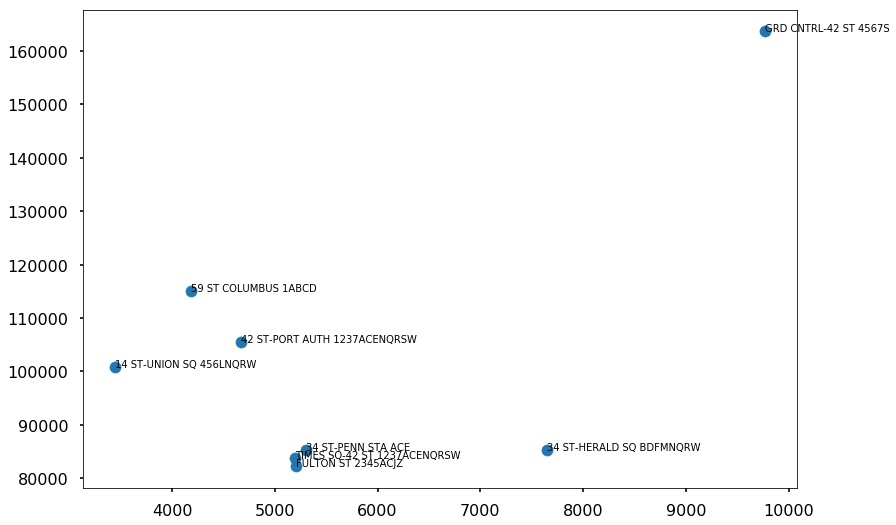

In [292]:
# fig, ax = plt.subplots()
# ax.scatter(wkday_morn['Income'], wkday_morn['Traffic'])
# # wkday_morn.plot(kind = 'scatter', x = 'Income', y = 'Traffic')

# for i, txt in enumerate(wkday_morn['Station']):
#     ax.annotate(txt, (wkday_morn[i].Income,wkday_morn[i].Traffic))


y = wkday_morn.Income.values.tolist()
z = wkday_morn.Traffic.values.tolist()
n = wkday_morn.Station.values.tolist()

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))
    
# from matplotlib import cm
# cmap = cm.get_cmap('Spectral')
# wkday_morn.plot('Income', 'Traffic', kind='scatter', ax=ax, s=120, linewidth=0, 
#         c=range(len(wkday_morn)), colormap=cmap)

# for k, v in wkday_morn.iterrows():
#     ax.annotate(k, v,
#                 xytext=(10,-5), textcoords='offset points',
#                 family='sans-serif', fontsize=18, color='darkslategrey')


In [293]:
# Weekday Afternoon
wkday_aft = gd_weekday_afternoon[['topfilter','avg_totals_station','avg_income','zip_code']]
wkday_aft = wkday_aft.rename(index=str, columns={"topfilter": "Station", "avg_totals_station": "Traffic", "avg_income": "Income","zip_code": "Zip"})

wkday_aft

,Station,Traffic,Income,Zip
0,14 ST-UNION SQ 456LNQRW,7076.125412,100791,10003
1,34 ST-HERALD SQ BDFMNQRW,8511.768785,85168,10001
2,34 ST-PENN STA ACE,4922.168773,85168,10001
3,42 ST-PORT AUTH 1237ACENQRSW,4430.283324,105479,10018
4,59 ST COLUMBUS 1ABCD,4710.940625,115080,10023
5,FULTON ST 2345ACJZ,5738.122997,82190,10038
6,GRD CNTRL-42 ST 4567S,10833.217196,163683,10017
7,TIMES SQ-42 ST 1237ACENQRSW,5535.335193,83812,10036


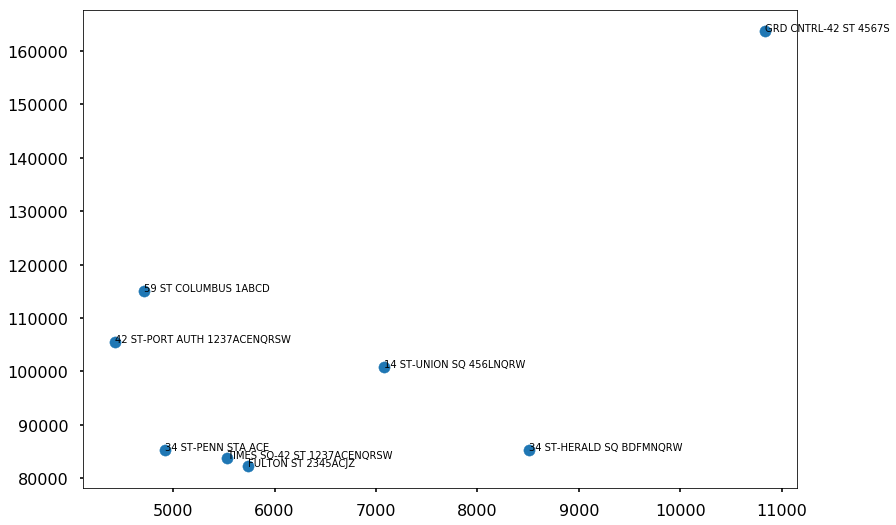

In [294]:
y = wkday_aft.Income.values.tolist()
z = wkday_aft.Traffic.values.tolist()
n = wkday_aft.Station.values.tolist()

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

In [295]:
# Weekend Morn
wknd_morn = gd_weekend_morning[['topfilter','avg_totals_station','avg_income','zip_code']]
wknd_morn = wknd_morn.rename(index=str, columns={"topfilter": "Station", "avg_totals_station": "Traffic", "avg_income": "Income","zip_code": "Zip"})

wknd_morn

,Station,Traffic,Income,Zip
0,14 ST-UNION SQ 456LNQRW,774.234323,100791,10003
1,34 ST-HERALD SQ BDFMNQRW,568.836628,85168,10001
2,34 ST-PENN STA ACE,452.498876,85168,10001
3,42 ST-PORT AUTH 1237ACENQRSW,787.461957,105479,10018
4,59 ST COLUMBUS 1ABCD,367.593750,115080,10023
5,FULTON ST 2345ACJZ,511.151296,82190,10038
6,GRD CNTRL-42 ST 4567S,805.754717,163683,10017
7,TIMES SQ-42 ST 1237ACENQRSW,458.671875,83812,10036


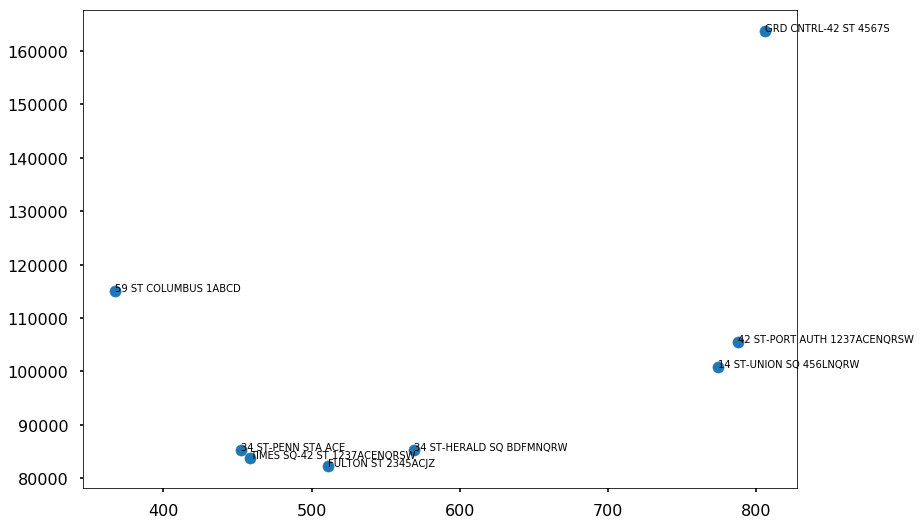

In [296]:
y = wknd_morn.Income.values.tolist()
z = wknd_morn.Traffic.values.tolist()
n = wknd_morn.Station.values.tolist()

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

In [297]:
# Weekend Afternoon
wknd_aft = gd_weekend_afternoon[['topfilter','avg_totals_station','avg_income','zip_code']]
wknd_aft = wknd_aft.rename(index=str, columns={"topfilter": "Station", "avg_totals_station": "Traffic", "avg_income": "Income","zip_code": "Zip"})
wknd_aft


,Station,Traffic,Income,Zip
0,14 ST-UNION SQ 456LNQRW,4671.296875,100791,10003
1,34 ST-HERALD SQ BDFMNQRW,4587.997683,85168,10001
2,34 ST-PENN STA ACE,2731.000000,85168,10001
3,42 ST-PORT AUTH 1237ACENQRSW,2927.690577,105479,10018
4,59 ST COLUMBUS 1ABCD,2768.101562,115080,10023
5,FULTON ST 2345ACJZ,1830.994123,82190,10038
6,GRD CNTRL-42 ST 4567S,4079.297099,163683,10017
7,TIMES SQ-42 ST 1237ACENQRSW,3381.601562,83812,10036


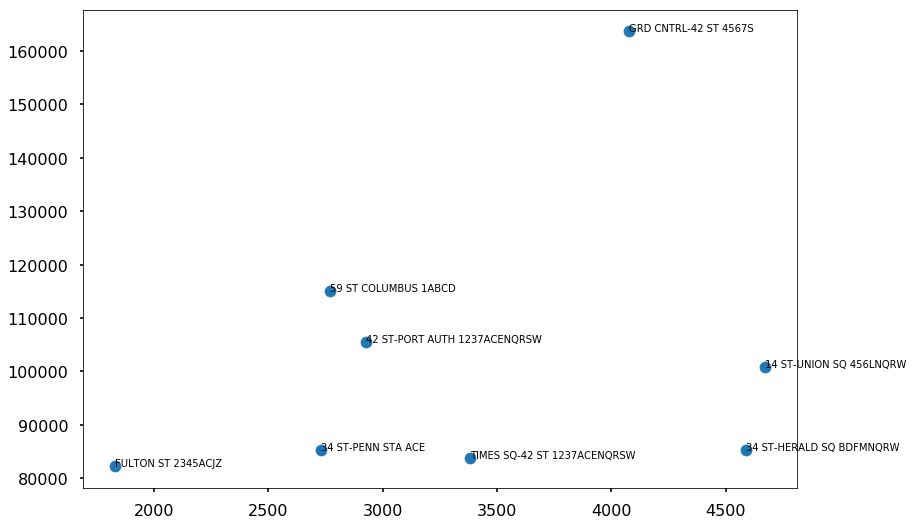

In [298]:
y = wknd_aft.Income.values.tolist()
z = wknd_aft.Traffic.values.tolist()
n = wknd_aft.Station.values.tolist()

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

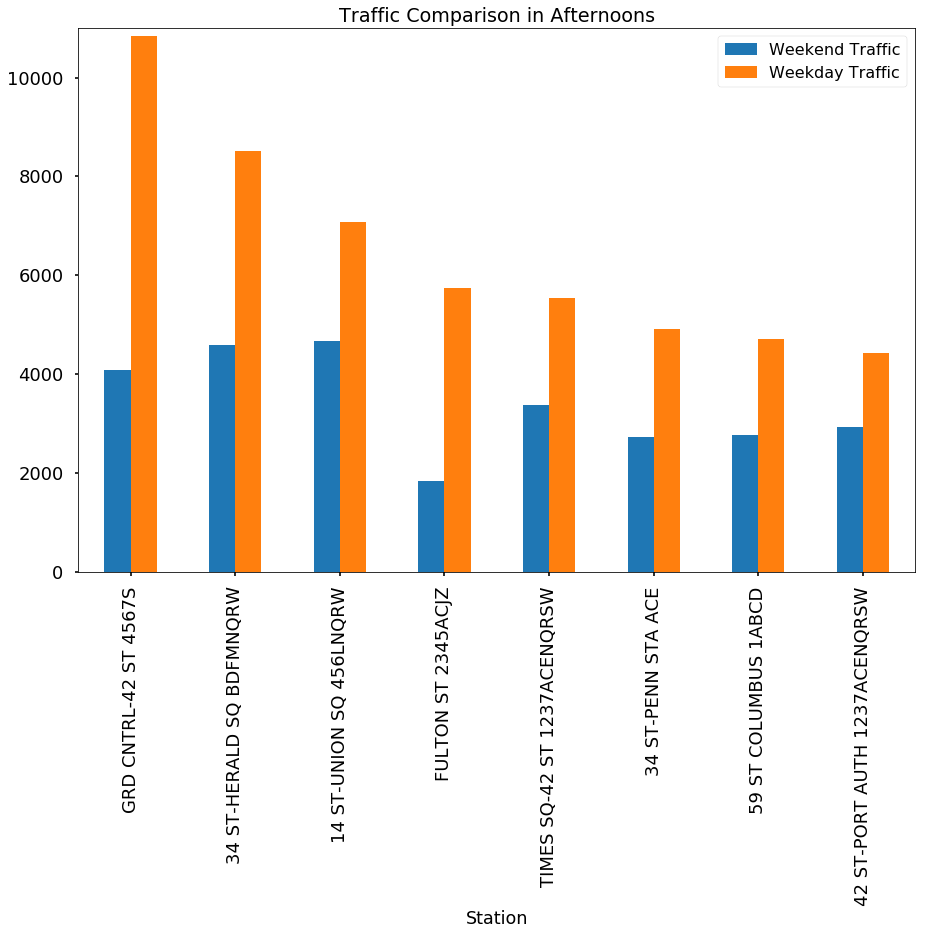

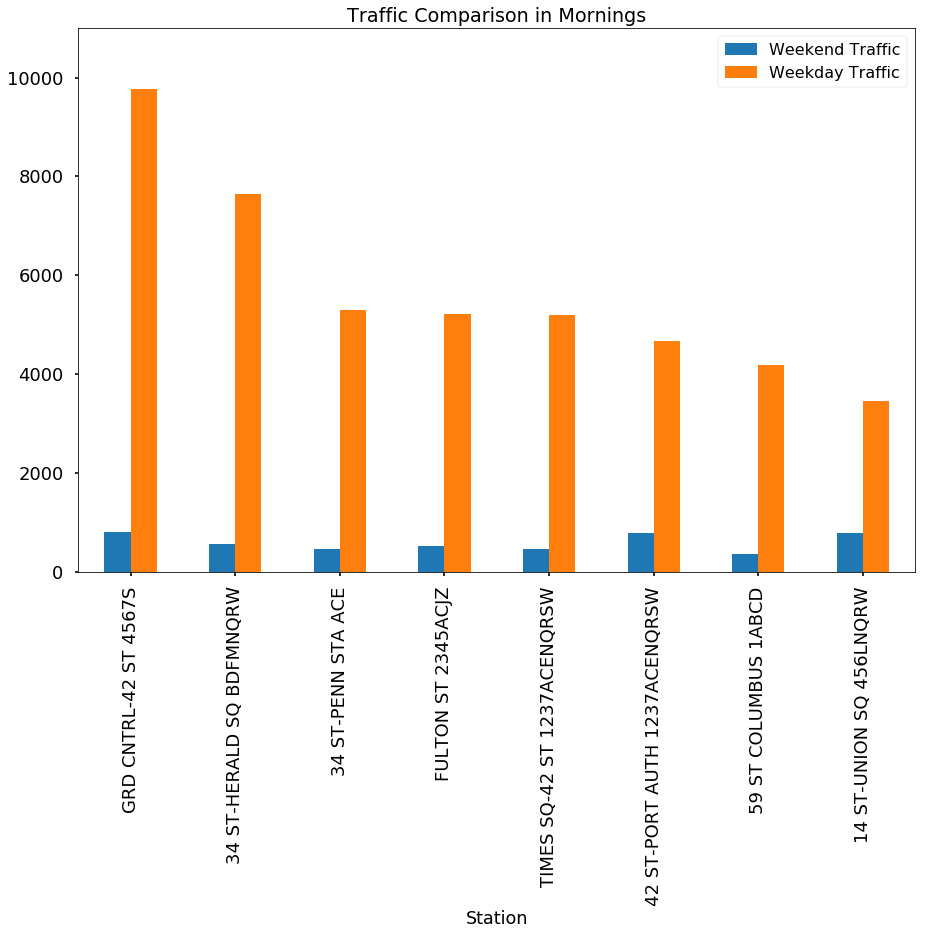

In [301]:
a=wknd_aft.groupby('Station').sum()
b=wkday_aft.groupby('Station').sum()

c=wknd_morn.groupby('Station').sum()
d=wkday_morn.groupby('Station').sum()

a=a.drop('Zip',1)
b=b.drop('Zip',1)

c=c.drop('Zip',1)
d=d.drop('Zip',1)

a['Weekday Traffic']=b.Traffic
a['Weekend Traffic'] = a['Traffic']

c['Weekday Traffic']=d.Traffic
c['Weekend Traffic']=c['Traffic']

a = a.sort_values(by=['Weekday Traffic'], ascending = False)
c = c.sort_values(by=['Weekday Traffic'], ascending = False)


ax = a[['Weekend Traffic','Weekday Traffic']].plot(kind='bar', ylim=[0,11000], title ="Traffic Comparison in Afternoons", figsize=(15, 10), legend=True, fontsize=18)
fig = ax.get_figure()
fig.savefig('afternoontraffic.png')
ax = c[['Weekend Traffic','Weekday Traffic']].plot(kind='bar', ylim=[0,11000], title ="Traffic Comparison in Mornings", figsize=(15, 10), legend=True, fontsize=18)
fig = ax.get_figure()
fig.savefig('morningtraffic.png')